# Clustering Jerárquico

## Machine Learning. Grado en Ciencia de datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering


%matplotlib inline

### El conjunto de datos

Los datos sobre los que vamos a trabajar se basan en el conjunto de datos `protein`. Después de examinar los datos, vemos que los datos están separados por un tabulador y que los nombres de los países están en la primera columna. Para cargarlos debemos ejecutar la siguiente instrucción, en la que le indicamos el carácter de separación y que el nombre del país va a ser el índice del data frame.

In [3]:
proteindata = pd.read_csv('Datos/proteindata.txt', sep='\t', index_col=0)

Vamos a examinar los datos para ver si se han leido correctamente

In [4]:
proteindata

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,FruitVeg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechosl.,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
EGermany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5


Aparentemente, todos los datos han sido leídos correctamente. Sin embargo, nos queda por comprobar si los tipos asignados son los adecuados.

In [5]:
proteindata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Albania to Yugosl.
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RedMeat    25 non-null     float64
 1   WhiteMeat  25 non-null     float64
 2   Eggs       25 non-null     float64
 3   Milk       25 non-null     float64
 4   Fish       25 non-null     float64
 5   Cereals    25 non-null     float64
 6   Starch     25 non-null     float64
 7   Nuts       25 non-null     float64
 8   FruitVeg   25 non-null     float64
dtypes: float64(9)
memory usage: 2.0+ KB


Una vez comprobado que hemos leído correctamente los datos, tenemos que comprobar cómo están distribuidos los datos, para ver si es necesario una estandarización de los mismos. Para ello podemos realizar un gráfico de barras.

<Axes: >

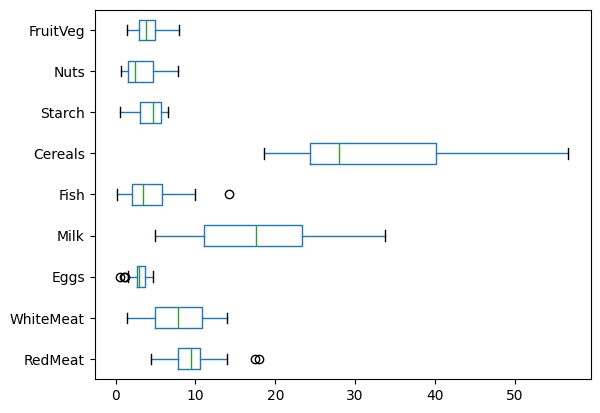

In [6]:
proteindata.boxplot(grid=False, vert=False)

Como se puede apreciar es necesario que transformar los datos para que estos estén en la misma escala y los podamos comparar.

In [7]:
scaler = StandardScaler()
scaler.fit(proteindata)
data_scaled = scaler.transform(proteindata)

<Axes: >

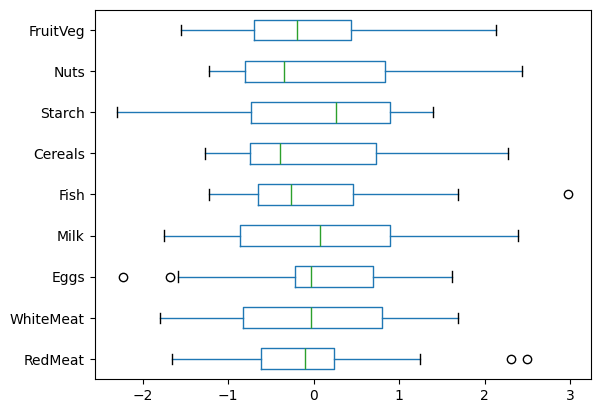

In [8]:
protein_scaled = pd.DataFrame(data_scaled, columns=proteindata.columns, index=proteindata.index)
protein_scaled.boxplot(grid=False, vert=False)

### Clustering Jerárquico en la librería Scipy

Para realizar el clustering jerárquico aglomerativo tenemos en la librería `scipy` la función `linkage()` cuyos parámetros son:

- **y**, que puede ser o bien un dataframe o una matriz condensada de distancias (función `disntance.pdist()`).
- **method**, método utilizado para calcular la distancia de los nuevos clusters a los clusters ya existentes. Los posibles valores pueden ser: `single` (valor por defecto), `complete`, `average`, `weighted`, `centroid`, `median` y `ward`.
- **metric**, métrica de distancia utilizada que por defecto es la `euclídea`. Para ver todas las distancias que se pueden utilizar consultar la función `distance.pdist()`.

A continuación se muestra cómo calcular el clustering jerárquico aglomerativo utilizando el método de `Ward`.

In [9]:
Hier_ward_scaled = hierarchy.linkage(protein_scaled, method ='ward')

Para poder analizar un clustering jerárquico lo más común es visualizar su dendograma. Para dibujarlo tenemos la función `dendongram()` dentro del módulo `scipy.hierarchy`.

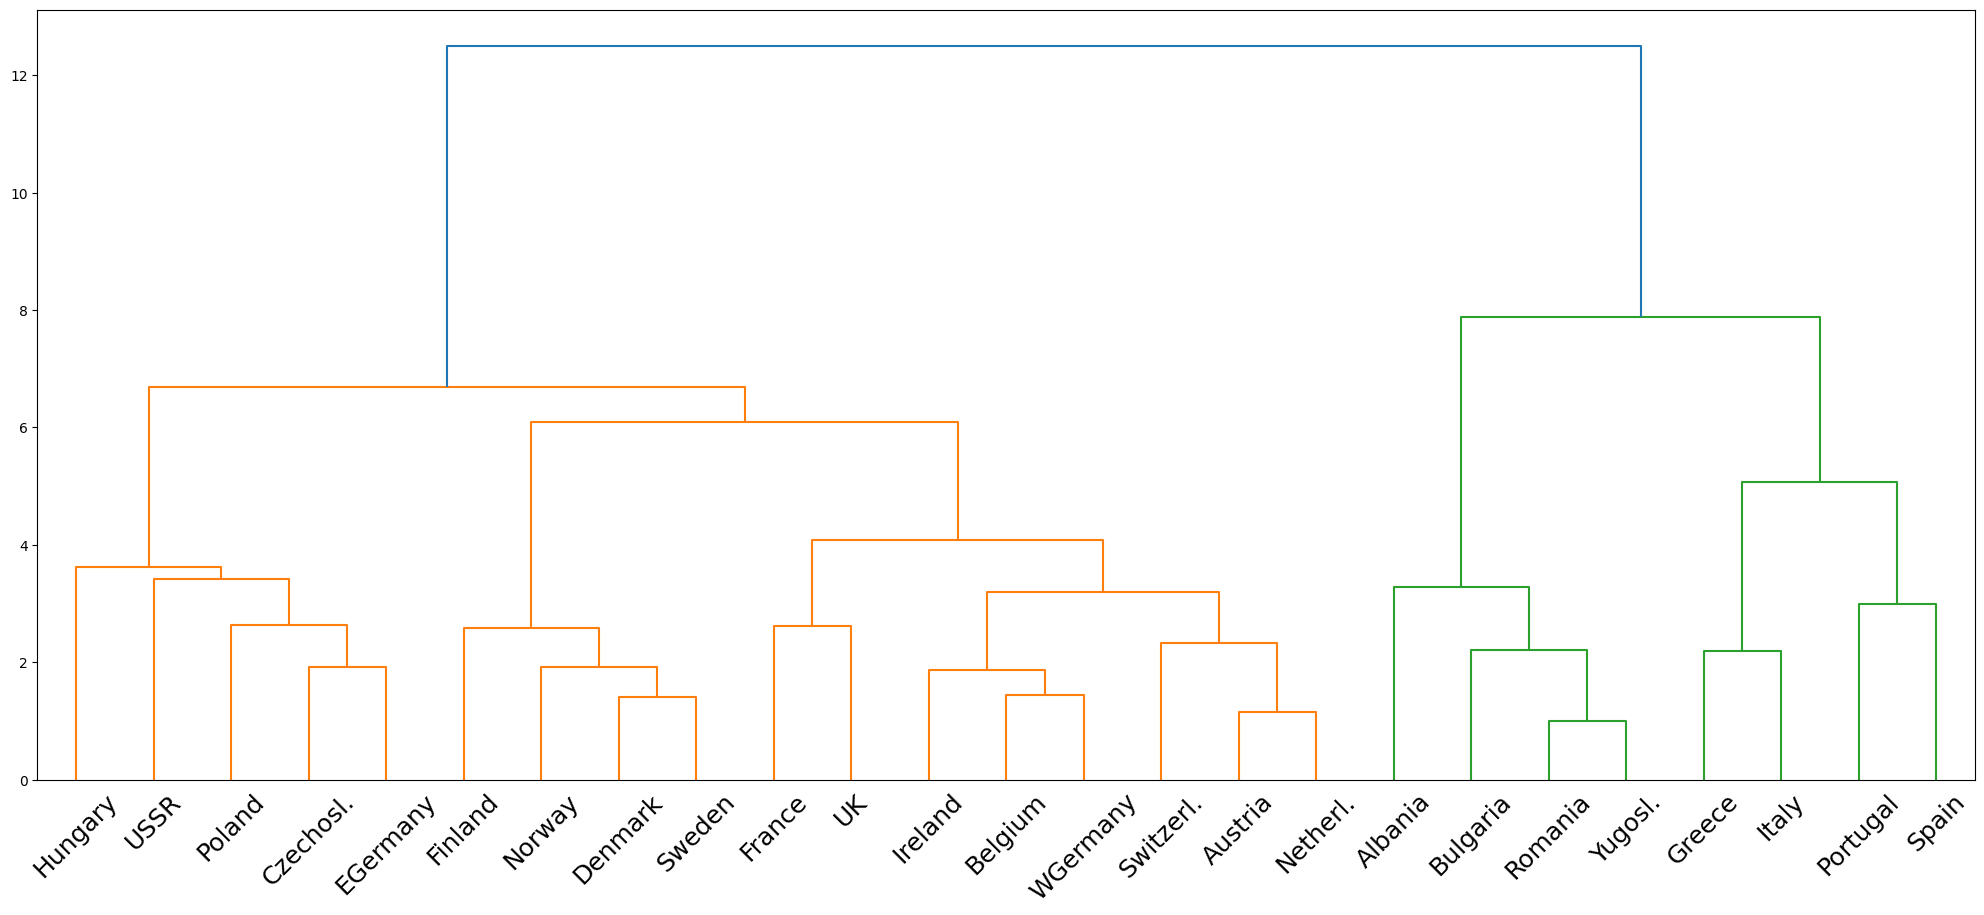

In [10]:
fig = plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(Hier_ward_scaled,labels=protein_scaled.index,leaf_font_size=18)

Una vez que hemos analizado el resultado de al aplicar el clustering jerárquico a nuestro dataset, extraer los clusters que nos parezcan de interés. Para ello tenemos la función `cut_tre()` del  módulo `scipy.hierarchy`. Esta función tiene los siguientes parámetros:

- **Z** : que es es resultado de la función `linkage()`.
- **n_clusters o height** : array que indica el número de clusters que se quiere obtener o a la altura que se corta el dendograma.

Por ejemplo, si queremos determinar cómo quedan los datos agrupados en 3,4 o 5 clusters, bastaría con realizar la siguiente llamada:

In [11]:
clusters_ward = hierarchy.cut_tree(Hier_ward_scaled,n_clusters=[3,4,5])
clusters_ward

array([[0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [1, 2, 2],
       [1, 1, 3],
       [1, 2, 2],
       [1, 1, 3],
       [1, 1, 1],
       [2, 3, 4],
       [1, 2, 2],
       [1, 1, 1],
       [2, 3, 4],
       [1, 1, 1],
       [1, 1, 3],
       [1, 2, 2],
       [2, 3, 4],
       [0, 0, 0],
       [2, 3, 4],
       [1, 1, 3],
       [1, 1, 1],
       [1, 1, 1],
       [1, 2, 2],
       [1, 1, 1],
       [0, 0, 0]])

Cómo se puede apreciar se nos devuelve una array de $3\times n\_instancias$ en en el que cada columna indica cómo quedarían agrupados las instancias según el número de clusters indicados en `n_clusters`. Para realizar la misma operación pero cortando el dendograma a una determinada altura, habría que utilizar el parámetro `height`.

In [12]:
clusters_ward_height = hierarchy.cut_tree(Hier_ward_scaled,height=[10,5])
clusters_ward_height

array([[0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 2],
       [1, 3],
       [1, 2],
       [1, 3],
       [1, 1],
       [0, 4],
       [1, 2],
       [1, 1],
       [0, 4],
       [1, 1],
       [1, 3],
       [1, 2],
       [0, 5],
       [0, 0],
       [0, 5],
       [1, 3],
       [1, 1],
       [1, 1],
       [1, 2],
       [1, 1],
       [0, 0]])

### Clustering jerárquico con la librería sklearn

La librería `sklearn` también nos proporciona una forma realizar el clustering jerárquico aglomerativo mediante la función `AgglomerativeClustering()` del módulo `cluster`. Los principales parámetros de esta función son:

- **n_clusters (int)**: número de cluster que en los que se quieren agrupar los datos. Si queremos generar los clusters según un umbral de distancia tenemos que utilizar el parámetro **distance_threshold (float)** y utilizar el valor `None` para este parámetro e indicarle que tiene que calcular el árbol entero, **compute_full_tree (True)**.
- **metric**: función de distancia entre instancias que se va a utilizar. Puede ser `euclidean`, `l1`, `l2`, `manhattan`, `cosine` o `precomputed` con lo que hay que suministrar la matriz de distancias a la función `fit()`.
- **linkage**: método para calcular la distancia entre clusters: `ward`, `complete`, `average`, `single`.

Por ejemplo, si queremos calcular como quedarían los países agrupados en 4 clusters utilizando la distancia euclídea y el método de ward llamaríamos a la función de esta forma:

In [13]:
clusters_euclidean_ward = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')

Una vez definido el tipo de clustering que queremos hacer sólo tenemos que llamar al método `fit()` pasándole el dataset sobre el que queremos hacer el clustering

In [14]:
clusters_fit = clusters_euclidean_ward.fit(protein_scaled)

y para saber a qué cluster ha sido asignada cada instancia sólo tenemos que acceder al atributo `labels_`

In [15]:
clusters_fit.labels_

array([2, 0, 0, 2, 3, 0, 3, 0, 0, 1, 3, 0, 1, 0, 0, 3, 1, 2, 1, 0, 0, 0,
       3, 0, 2], dtype=int64)

Mediante la función `is_isomorphic()` del módulo `cluster.hiearchy` del paquete `scipy` podemos comprobar que los dos funciones utilizadas nos devuelven los mismos clusters.

In [16]:
hierarchy.is_isomorphic(clusters_fit.labels_,clusters_ward[:,1])

True

Una forma de visualizar el resultado del clustering es mediante los gráficos de dispersión que nos permiten ver cómo se distribuyen las instancias a lo largo de dos dimensiones definidas por dos atributos del dataframe. A continuación se puede ver un ejemplo en el que se muestran como quedan agrupados los países en función de las proteínas procedentes de la carne roja y del pescado.

C:\Users\fcoja\AppData\Local\Temp\ipykernel_17084\3081587906.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(label, (protein_scaled["RedMeat"][i], protein_scaled["Fish"][i]),


Text(0, 0.5, 'Fish')

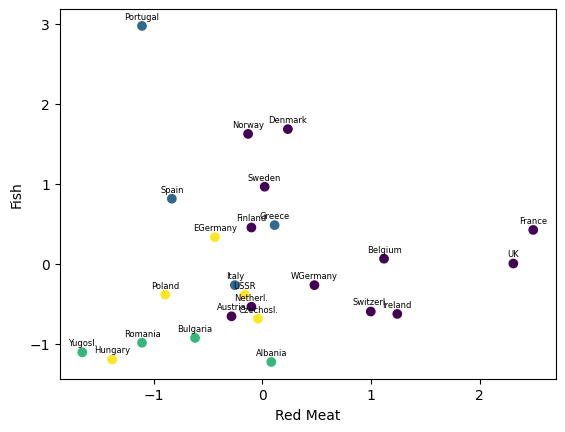

In [17]:
paises = np.array(protein_scaled.index).astype(str)
plt.scatter(protein_scaled["RedMeat"],protein_scaled["Fish"],
             c=clusters_fit.labels_, cmap='viridis')
for i, label in enumerate(paises):
    plt.annotate(label, (protein_scaled["RedMeat"][i], protein_scaled["Fish"][i]),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=6)
plt.xlabel('Red Meat')
plt.ylabel('Fish')

### Medidas de calidad

Gracias a las funciones proporcionadas por el módulo `sklearn.metrics` podemos evaluar la calidad de una agrupación y poder comparar, de esta forma, distintas configuraciones de las mismas.

Como ya vimos en la parte de teoría, el **índice silueta** es un índice que varía entre 1 y -1, siendo 1 para un clustering perfecto. Este índice se calcula para cada instancia, siendo 1 para las instancias asignadas correctamente a un cluster y -1 en el caso contrario. Para calcular, el índice silueta de cada instancia del data set tenemos la función `metrics.silhouette_samples()` a la que tenemos que pasarle como parámetros el dataset y un array con los clusters asignados a cada instancia.

In [18]:
metrics.silhouette_samples(protein_scaled,labels = clusters_ward[:,0])

array([ 0.45286924,  0.4290316 ,  0.44257431,  0.49283443,  0.33359721,
        0.42842776,  0.3737288 ,  0.35650511,  0.23803017,  0.14083036,
       -0.18484816,  0.47645858,  0.04908266,  0.47846141,  0.25860111,
        0.16317938,  0.29485513,  0.55303849,  0.33677429,  0.41369748,
        0.3451479 ,  0.31209346, -0.01767994,  0.4944478 ,  0.55903427])

Para calcular el índice silueta medio para todas las instancias podemos utilizar la función `metrics.silhouette_score()`, que tiene los mismos parámetros que la función anterior

In [19]:
metrics.silhouette_score(protein_scaled,labels = clusters_ward[:,0])

0.32883091422973465

Otro índice que nos puede ayudar a comparar la calidad de distintas configuraciones de asignación de instancias a clusters el **índice de Davies_Boulin**, que se puede calcular a través de la función  `metrics.davies_bouldin_score` que tiene los mismos parámetros que la anteriores. Con esta medida un valor 0 indicaría un asignación perfecta de instancias a clustering.

In [20]:
metrics.davies_bouldin_score(protein_scaled,labels = clusters_ward[:,0])

1.0567560550804076

### Ejercicios para practicar

Utilizando el mismo dataset:
1. Generar diferentes clusterings probando diferentes combinaciones de métricas de distancias y de distancias entre clusters.
2. Generar un dataframe con los datos originales sobre consumo de proteínas y que contengan una columna adicional que indique a qué cluster pertenece cada instancia para una configuración determinada. Una vez generado el dataframe, sacar un listado indicando, para cada cluster, qué países pertenecen.
3. Implementar un procedimiento qué, utilizando algunos de los índices analizados, determine el número óptimo de clusters. El procedimiento debe tener los siguientes parámetros:
    - dataframe sobre el que hacer los clsuters.
    - número mínimo de clusters
    - máximo número de clusters
    - medida de distancia a utilizar, que por defecto debe ser la **euclídea**
    - medida de distancia entre clusters a utilizar, que por defecto debe ser la de **Ward**

El procedimiento debe devolver el número óptimo de clusters, **k**, y la asignación de clusters que resulta.  

In [31]:
prueba_cluster1 = AgglomerativeClustering(n_clusters=2, metric='l1', linkage="complete")
prueba_cluster1_fit = prueba_cluster1.fit(proteindata)